In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import scipy.stats
from loess.loess_2d import loess_2d
from matplotlib.patches import Circle
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import cmasher as cmr
plt.rcParams.update({'font.size': 14})

In [ ]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = sample.dropna()
sample = sample[(sample["v_asym_tot"]/sample["v_asym_tot_err"])>3]
bpt = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_BPT.csv")
SF = bpt[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==1]
sample = sample[sample["MAGPIID"].isin(SF["MAGPIID"])]
SF = SF[SF["MAGPIID"].isin(sample['MAGPIID'])]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
k35 = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_k24_k35.csv")
k35 = k35[k35["MAGPIID"].isin(sample['MAGPIID'])]
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(sample["MAGPIID"])]
xx = np.logspace(8.5,11.5, 55)
MS = (xx**0.730)*(10**-7.482)
SFR = SF["SFR, dust corrected"].to_numpy()
mass = prospect["StellarMass_median"].to_numpy()
mass_err = prospect["StellarMass_16"].to_numpy()
SFR_err =SF["SFR_err"].to_numpy()
asym = sample["v_asym_tot"].to_numpy()

D_SFR = (np.log10(SFR) - np.log10(mass**(0.730)*(10**(-7.482)))) > -1
colors=[]
for i in D_SFR:
    if i:
        colors.append("k")
    else:
        colors.append("brown")
colors=np.array(colors)

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(figsize=(8,5))
p=ax.scatter(mass,SFR, zorder=2,ec=colors,s=55,linewidths=1.5, c=np.log10(asym),vmin=np.log10(0.04)-0.3,vmax=np.log10(0.04)+0.3,cmap="cmr.wildfire")
ax.errorbar(mass,SFR,xerr=mass_err, yerr=SFR_err, c='gray', zorder=1, ls="")
ax.plot(xx,MS, c="magenta", ls="dashdot", label="MS (z~0.35)")
#ax.plot(xx,MS*0.1, c="magenta", ls="dashdot")
#ax.plot(xx,MS*10, c="magenta", ls="dashdot")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10**(-2.2),10**(1.5))
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [M$_\odot$ yr$^{-1}$]")
cbar = plt.colorbar(p,ax=ax, pad=0,fraction=0.09,label=r"$\log \langle v_{asym} \rangle$",location="top",ticks=[-1.6,-1.5,-1.4,-1.3,-1.2])
cbar.ax.plot([np.log10(0.04),np.log10(0.04)],[0,1],"w", lw=2)
plt.savefig("plots/SFMS_asym_10Myrs.pdf", bbox_inches="tight")

asym = k35["k35_2re"].to_numpy()
fig,ax = plt.subplots(figsize=(8,5))
p=ax.scatter(mass,SFR, zorder=2,ec=colors,s=55,linewidths=1.5, c=np.log10(asym),vmin=np.log10(0.068)-0.3,vmax=np.log10(0.068)+0.3, cmap="cmr.wildfire")
ax.errorbar(mass,SFR,xerr=mass_err, yerr=SFR_err, c='gray', zorder=1, ls="")
ax.plot(xx,MS, c="magenta", ls="dashdot", label="MS (z~0.35)")
#ax.plot(xx,MS*0.1, c="magenta", ls="dashdot")
#ax.plot(xx,MS*10, c="magenta", ls="dashdot")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10**(-2.2),10**(1.5))
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [M$_\odot$ yr$^{-1}$]")
cbar = plt.colorbar(p,ax=ax, pad=0,fraction=0.09,label=r"$\log \langle v_{asym} \rangle$", location="top", ticks=[-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0])
cbar.ax.plot([np.log10(0.068),np.log10(0.068)],[0,1],"w", lw=2)
plt.savefig("plots/SFMS_asym_Ha_SAMI.pdf", bbox_inches="tight")

In [219]:
new_sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#new_sample = new_sample[new_sample["v_asym_stars"]/new_sample["v_asym_stars_err"]>1]
#new_sample = new_sample[new_sample["v_asym_gas"]/new_sample["v_asym_gas_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(new_sample["MAGPIID"])]
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(new_sample["MAGPIID"])]

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_10156/2614761151.py:4: RuntimeWarning: divide by zero encountered in log10
  D_SFR = (np.log10(bpt["SFR, dust corrected"].to_numpy()) - np.log10(prospect["StellarMass_median"].to_numpy())**(0.730)*(10**(-7.482))) > -1
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_10156/2614761151.py:13: RuntimeWarning: divide by zero encountered in log10
  p=ax.scatter(prospect["StellarMass_median"],bpt['SFR, dust corrected'],ec=colors,c=np.log10(new_sample['v_asym_s'].to_numpy()),


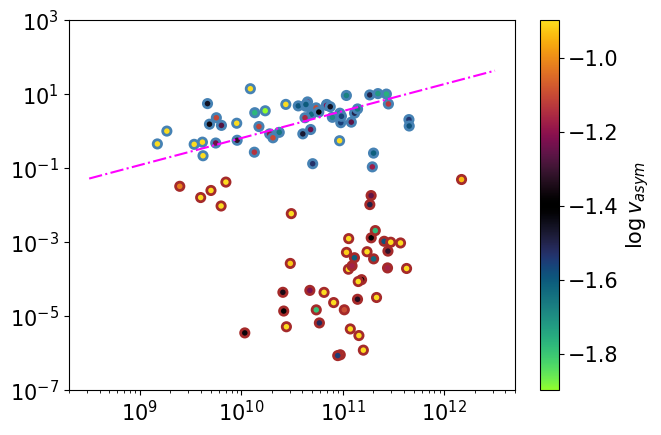

In [221]:
xx = np.logspace(8.5,12.5, 55)
MS = (xx**0.730)*(10**-7.482)

D_SFR = (np.log10(bpt["SFR, dust corrected"].to_numpy()) - np.log10(prospect["StellarMass_median"].to_numpy())**(0.730)*(10**(-7.482))) > -1
colors=[]
for i in D_SFR:
    if i:
        colors.append("steelblue")
    else:
        colors.append("brown")
colors=np.array(colors)
fig,ax = plt.subplots()
p=ax.scatter(prospect["StellarMass_median"],bpt['SFR, dust corrected'],ec=colors,c=np.log10(new_sample['v_asym_s'].to_numpy()),
             cmap="cmr.wildfire", vmin=np.log10(0.04)-0.5, vmax=np.log10(0.04)+0.5, lw=2)
ax.plot(xx,MS,ls="dashdot",c="magenta")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-7,1e3)
plt.colorbar(p,ax=ax,fraction=0.05,pad=0.05, label=r"$\log v_{asym}$")
plt.savefig("plots/new_SFMS.pdf",bbox_inches="tight")

In [222]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
file = file.dropna()
f = file[file["v_asym_05re"]>0.04]
f = f[f["v_asym_15re"]>0.04]
print(len(f)/len(file))
print(len(file[file["v_asym_05re"]<file["v_asym_15re"]])/len(file))

0.15555555555555556
0.6888888888888889


In [223]:
file = pd.read_csv("MAGPI_Emission_Lines/old_csv/kinemetry_sample_M1.csv")
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
file = file.dropna()
len(file[file["v_asym_15re"]>file["v_asym_05re"]])/len(file)

0.9111111111111111

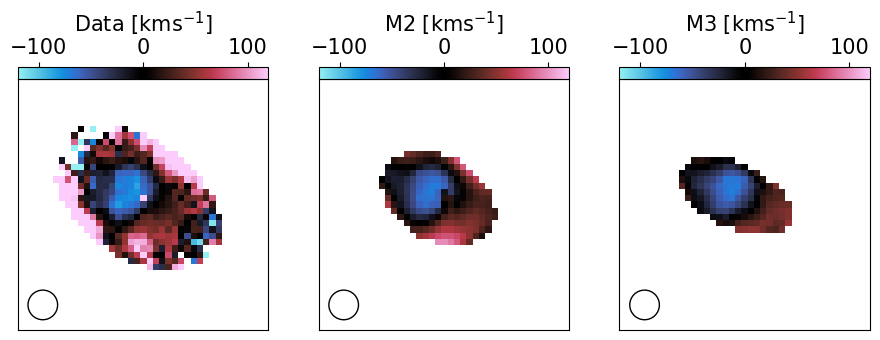

In [224]:
f = "MAGPI_Emission_Lines/MAGPI2310/plots4/MAGPI2310167176_velocity/MAGPI2310167176_z_0.2832_Ha_kinemetry.fits"
file = fits.open(f)
z = 0.2832
pix = cosmo.luminosity_distance(z).to(u.kpc).value
pix = np.radians((0.65/2)/3600)*pix
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11,4))
p1=ax1.imshow(file[2].data,vmin=-120,vmax=120,cmap="cmr.redshift")
p2=ax2.imshow(file[5].data,vmin=-120,vmax=120,cmap="cmr.redshift")
p3=ax3.imshow(file[6].data,vmin=-120,vmax=120,cmap="cmr.redshift")
for p,ax,label in zip([p1,p2,p3],[ax1,ax2,ax3],[r"Data [kms$^{-1}$]",r"M2 [kms$^{-1}$]",r"M3 [kms$^{-1}$]"]):
    plt.colorbar(p,ax=ax, label=label,pad=0.0,fraction=0.05, location="top")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(17,57)
    ax.set_ylim(17,57)
    ax.add_patch(Circle(xy=(21,21),radius=pix,ec="k",fc="none"))
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/M2_M3_washout.pdf",bbox_inches="tight")
file.close()

0.1111111111111111


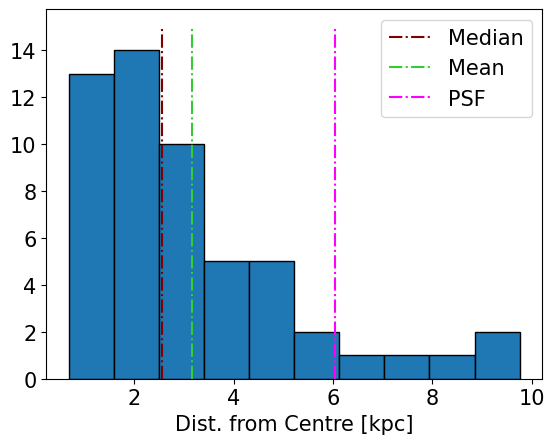

In [225]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_k24_k35.csv")
pix = np.radians((0.65)/3600)*cosmo.luminosity_distance(z=0.35).to(u.kpc).value
print(len(file[file["r_dist"]>pix])/len(file))
fig,ax = plt.subplots()
ax.hist(file["r_dist"].to_numpy(), ec="k")
ax.vlines(np.median(file["r_dist"].to_numpy()),colors="maroon", ymin=0,ymax=15,ls="dashdot", label="Median")
ax.vlines(np.mean(file["r_dist"].to_numpy()),colors="limegreen", ymin=0,ymax=15,ls="dashdot", label="Mean")
ax.vlines(pix,colors="magenta", ymin=0,ymax=15,ls="dashdot", label="PSF")
ax.set_xlabel("Dist. from Centre [kpc]")
ax.legend()
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/r_dist_distribution.pdf",bbox_inches="tight")

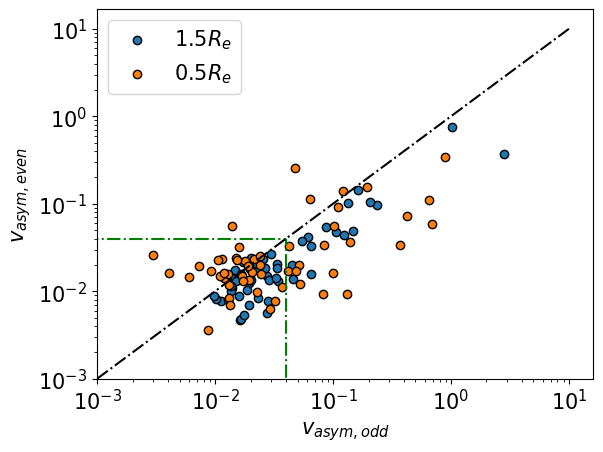

In [226]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots()
ax.scatter(file["k35_15re"]/2,file["k24_15re"]/2,ec="k",label=r"$1.5R_e$")
ax.scatter(file["k35_05re"]/2,file["k24_05re"]/2,ec="k",label=r"$0.5R_e$")
ax.vlines(0.04,ymin=10**(-3.5),ymax=0.04,colors="g",ls="dashdot")
ax.hlines(0.04,xmin=10**(-3.1),xmax=0.04,colors='g',ls="dashdot")
ax.plot(np.logspace(-3,1),np.logspace(-3,1),ls="dashdot",color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$v_{asym,even}$")
ax.set_xlabel(r"$v_{asym,odd}$")
ax.set_xlim(10**(-3.0))
ax.set_ylim(10**(-3.0))
ax.legend()
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/M2_even_contribution.pdf",bbox_inches="tight")

In [227]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#file = file.dropna()
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(file["MAGPIID"])]
file[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==2]

,Unnamed: 0,MAGPIID,v_asym_g,v_asym_g_err,v_asym_s,v_asym_s_err,PA_g,PA_s,D_PA,V_rot_g,V_rot_s
16,16,1205093221,NaN,NaN,0.130118,0.022086,NaN,15.816850,NaN,NaN,43.912689
26,26,1207128248,0.065694,0.001267,0.019949,0.002286,-35.244612,-14.652705,20.591908,150.315438,165.354019
33,33,1501176107,NaN,NaN,0.066292,0.007956,NaN,-7.946400,NaN,NaN,114.351104
52,52,1511197198,NaN,NaN,0.028976,0.001742,NaN,-84.245049,NaN,NaN,337.426933
84,84,2301290261,0.144659,0.004815,0.033683,0.003090,2.177150,-41.395105,43.572254,197.991125,130.103627
86,86,2302197233,NaN,NaN,0.029609,0.002526,NaN,105.879741,NaN,NaN,145.436079
96,96,2307145281,NaN,NaN,0.055283,0.006354,NaN,78.438826,NaN,NaN,145.210549
99,99,2307228105,NaN,NaN,0.025955,0.002236,NaN,-51.600621,NaN,NaN,203.204455


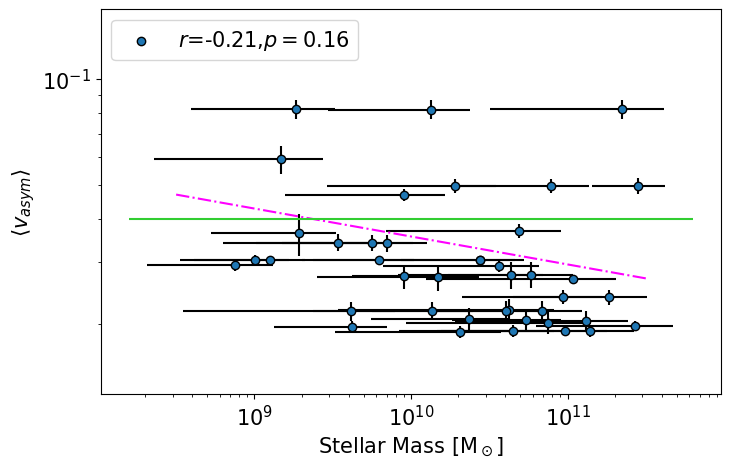

In [228]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file = file.dropna()
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect=prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]
pearson = scipy.stats.pearsonr(np.log10(prospect["StellarMass_median"].to_numpy()),np.log10(file['v_asym_tot'].to_numpy()))
fit = scipy.stats.linregress(np.log10(prospect["StellarMass_median"].to_numpy()),np.log10(file['v_asym_tot'].to_numpy()))
x = np.logspace(8.5,11.5)
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(prospect["StellarMass_median"].to_numpy(),file["v_asym_tot"].to_numpy(),ec="k",zorder=2, label=r"$r$="+f"{pearson[0]:.2f}"+r",$p=$"+f"{pearson[1]:.2f}")
ax.errorbar(prospect["StellarMass_median"].to_numpy(),file["v_asym_tot"].to_numpy(),xerr=prospect["StellarMass_16"].to_numpy(),yerr=file["v_asym_tot_err"].to_numpy(),fmt=".k",zorder=1)
ax.plot(x,(x**fit[0])*(10**fit[1]),ls="dashdot",c="magenta")
ax.hlines(y=0.04,xmin=10**(8.2),xmax=10**(11.8),colors="limegreen")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\langle v_{asym} \rangle$")
ax.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax.legend(loc="upper left")
ax.set_ylim(10**(-1.9),10**(-0.8))
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/v_asym-stellar-mass.pdf",bbox_inches="tight")

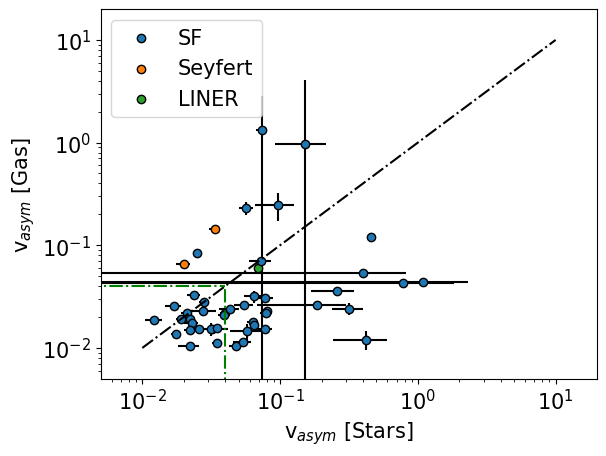

In [231]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#file = file[file["v_asym_stars"tars"]/file["v_asym_stars_err"]>3]
#file = file[file["v_asym_stars"]/file["v_asym_stars_err"]>3]
#file = file[file["v_asym_gas"]/file["v_asym_gas_err"]>3]
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
sf = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==1]["MAGPIID"])]
sy = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==2]["MAGPIID"])]
ln = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==3]["MAGPIID"])]
comp = file[file["MAGPIID"].isin(bpt[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0]["MAGPIID"])]
fig,ax = plt.subplots()
ax.scatter(sf["v_asym_s"],sf["v_asym_g"],label="SF",ec="k",zorder=2)
ax.scatter(sy["v_asym_s"],sy["v_asym_g"],label="Seyfert",ec="k",zorder=2)
ax.errorbar(sf["v_asym_s"],sf["v_asym_g"],xerr=sf['v_asym_s_err'],yerr=sf["v_asym_g_err"],fmt='.k',zorder=1)
ax.errorbar(sy["v_asym_s"],sy["v_asym_g"],xerr=sy['v_asym_s_err'],yerr=sy["v_asym_g_err"],fmt='.k',zorder=1)
ax.scatter(ln["v_asym_s"],ln["v_asym_g"],label="LINER",ec="k")
# ax.scatter(comp["v_asym_stars"],comp["v_asym_gas"],label="Comp",ec="k",zorder=2)
# ax.errorbar(comp["v_asym_stars"],comp["v_asym_gas"],xerr=comp['v_asym_stars_err'],yerr=comp["v_asym_gas_err"],fmt='.k',zorder=1)
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2],label="Seyfert",ec="k")
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3],label="LINER")
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0],label="Comp",ec="k")
ax.plot(np.linspace(1e-2,1e1), np.linspace(1e-2,1e1), ls='dashdot', c="k")
ax.vlines(0.04,ymin=10**(-3.5),ymax=0.04,colors="g",ls="dashdot")
ax.hlines(0.04,xmin=10**(-3.1),xmax=0.04,colors='g',ls="dashdot")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"v$_{asym}$ [Stars]")
ax.set_ylabel(r"v$_{asym}$ [Gas]")
ax.set_xlim(10**(-2.3),10**(1.3))
ax.set_ylim(10**(-2.3),10**(1.3))
ax.legend()
plt.savefig("plots/SF_AGN_gas_vs_stars.pdf",bbox_inches="tight")

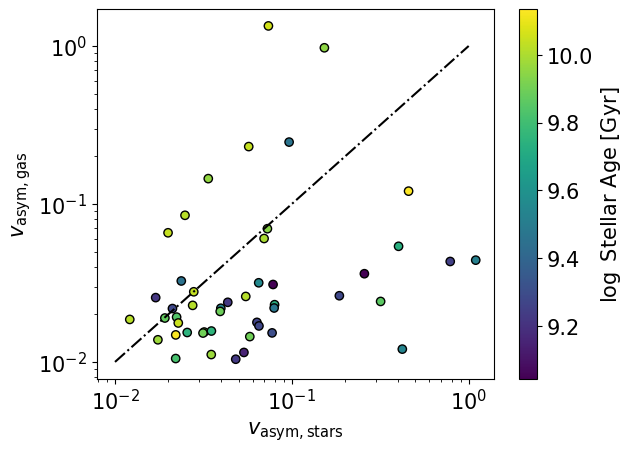

In [233]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
stellar_pop = pd.read_csv("MAGPI_stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
stellar_pop = stellar_pop[stellar_pop["MAGPIID"].isin(file["MAGPIID"])]
fig,ax = plt.subplots()
p=ax.scatter(file["v_asym_s"],file["v_asym_g"],c=stellar_pop["logage_MW_2re"],ec='k')
ax.plot(np.logspace(-2,0),np.logspace(-2,0),ls="dashdot",c="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,stars}$")
ax.set_ylabel(r"$v_{\rm asym, gas}$")
plt.colorbar(p,ax=ax,label=r"$\log$ Stellar Age [Gyr]")
plt.show()

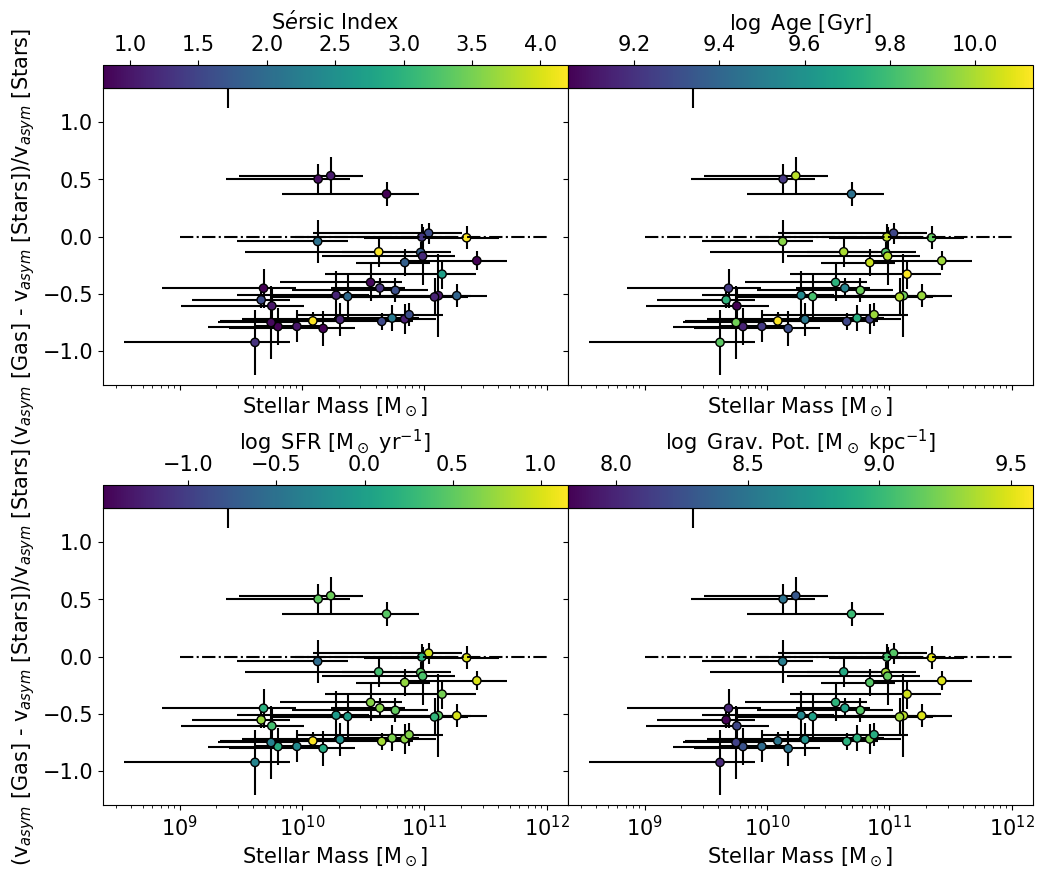

In [234]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
file = file[file["v_asym_s"]/file["v_asym_s_err"]>3]
file = file[file["v_asym_g"]>0]
d_vasym = (file["v_asym_g"] - file["v_asym_s"])/ file["v_asym_s"]
d_vasym_err = np.sqrt((file["v_asym_s_err"]/file["v_asym_s"])**2 + (file["v_asym_g_err"]/file["v_asym_g"])**2)

galfit = pd.read_csv("MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
galfit = galfit[galfit["MAGPIID"].isin(file["MAGPIID"])]
n = galfit["n"].to_numpy()

stellar_pop = pd.read_csv("MAGPI_stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
stellar_pop = stellar_pop[stellar_pop["MAGPIID"].isin(file["MAGPIID"])]
age = stellar_pop["logage_MW_2re"].to_numpy()

prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]

bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(file["MAGPIID"])]
SFR = bpt["SFR, dust corrected"].to_numpy()
pot= np.log10(prospect["StellarMass_median"].to_numpy()) - np.log10(bpt["re, kpc"])


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharey="row",sharex="col",figsize=(12,10))
p1=ax1.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=n,ec="k",zorder=2,vmin=0.8,vmax=4.2)
ax1.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p2=ax2.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=age,ec="k",zorder=2)
ax2.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p3=ax3.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=np.log10(SFR),ec="k",zorder=2)
ax3.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p4=ax4.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=pot,ec="k",zorder=2)
ax4.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
for p,ax,label in zip([p1,p2,p3,p4],[ax1,ax2,ax3,ax4], [r"S$\'{e}$rsic Index",r"$\log$ Age [Gyr]",r"$\log$ SFR [M$_\odot$ yr$^{-1}$]",
                                                        r"$\log$ Grav. Pot. [M$_\odot$ kpc$^{-1}$]"]):
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax1.set_ylabel(r"(v$_{asym}$ [Gas] - v$_{asym}$ [Stars])/v$_{asym}$ [Stars]")
    ax3.set_ylabel(r"(v$_{asym}$ [Gas] - v$_{asym}$ [Stars])/v$_{asym}$ [Stars]")
    ax.hlines(y=0,xmin=1e9,xmax=1e12,ls="dashdot",colors="k")
    ax.set_ylim(-1.3,1.3)
    plt.colorbar(p,ax=ax,label=label,location="top",pad=0)
ax1.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax2.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax3.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax4.set_xlabel(r"Stellar Mass [M$_\odot$]")
plt.subplots_adjust(wspace=0)
plt.savefig("plots/d_v_asym_age.pdf",bbox_inches="tight")

In [238]:
# f = open("MAGPI_csv/MAGPI_master_emission_lines.tbl","r")
# file = []
# for i in f:
#     file.append(i)
# f.close()
# hdr = file[4].split()
# data = []
# for i in range(5,len(file)):
#     data.append(file[i].split())
# data = np.array([list(x) for x in zip(*data)]).T
# data = pd.DataFrame(data,columns=hdr)
# data.to_csv("MAGPI_csv/MAGPI_master_emission_lines.csv",index=False)
# data = pd.read_csv("MAGPI_csv/MAGPI_master_emission_lines.csv").to_numpy()
# max_ln = []
# max_ln_err = []
# gal = []
# for i in range(len(data)):
#     if data[i,2]==-1:
#         continue
#     x = np.where(data[i]==np.max(data[i,4:]))[0][0]
#     #print(f"MAGPI{int(data[i,0]):.0f} Brightest Line is {hdr[x]}")
#     gal.append(int(data[i,0]))
#     max_ln.append(hdr[x]+'_F')
#     max_ln_err.append(hdr[x]+'_FERR')
# df = pd.DataFrame({"MAGPIID":gal,
#                    "MAX_LINE":max_ln,
#                    "MAX_LINE_ERR":max_ln_err})
# df.to_csv("MAGPI_csv/MAGPI_Emission_Max_Line.csv",index=False)

In [239]:
def clean_images(img, pa, a, b, img_err=None):
    y0, x0 = img.shape
    y0, x0 = y0 / 2, x0 / 2
    pa = pa - 90
    pa = np.radians(pa)
    for i in range(len(img[:, 0])):
        for j in range(len(img[0, :])):
            side1 = (((j - x0) * np.cos(pa)) + ((i - y0) * np.sin(pa))) ** 2 / (a ** 2)
            side2 = (((j - x0) * np.sin(pa)) - ((i - y0) * np.cos(pa))) ** 2 / (b ** 2)
            if side1 + side2 > 8:
                img[i, j] = np.nan
            if img_err is not None and abs(img_err[i, j]) < 3:
                img[i, j] = np.nan
    return img

In [240]:
# galaxy = 1207128248
# file = fits.open("MAGPI"+str(galaxy)+"_1dspec_1.5re.fits")
# data = file[1].data
# x = np.linspace(4700,9350,len(data))
# z = prospect[prospect["MAGPIID"].isin([galaxy])]["z"].to_numpy()[0]
# x = x/(1+z)
# fig,ax = plt.subplots(figsize=(14,4))
# ax.plot(x,data/np.max(data))
# ax.vlines(x=3727,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=3250,y=0.4,s=r"[OII] 3727$\AA$")
# ax.vlines(x=3730,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=3750,y=0.3,s=r"[OII] 3730$\AA$")
# ax.vlines(x=5008,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=5050,y=0.3,s=r"[OIII] 5008$\AA$")
# ax.vlines(x=4861,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=4420,y=0.4,s=r"H$\beta$ 4861$\AA$")
# ax.vlines(x=6562,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.42,s=r"H$\alpha$ 6562$\AA$")
# ax.vlines(x=6585,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.23,s=r"[NII] 6585$\AA$")
# ax.vlines(x=6718,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.34,s=r"[SII] 6718$\AA$")
# ax.vlines(x=6302,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.31,s=r"[SII] 6733$\AA$")
# ax.vlines(x=6733,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=5800,y=0.4,s=r"[OI] 6733$\AA$")
# ax.set_xlim(3200,7300)
# ax.set_ylim(0.005,0.455)
# ax.set_xlabel(r"Wavelength [$\AA$]")
# ax.set_ylabel("Normalised Flux Density")
# plt.savefig("plots/spectrum.pdf",bbox_inches="tight")

In [241]:
# file=pd.read_csv("MAGPI_env_metric/MAGPI_groups.txt",skiprows=50)
# file = []
# with open("MAGPI_env_metric/MAGPI_galaxies_in_groups.txt","r") as f:
#    for i in f:
#        print(i)
#        file.append(i)
# hdr = file[38].split(",")
# data = []
# for i in range(39,len(file)):
#     data.append(file[i].split(","))
# data = np.array([list(x) for x in zip(*data)]).T
# data = pd.DataFrame(data,columns=hdr)
# data.to_csv("MAGPI_env_metric/MAGPI_galaxies_in_groups.csv",index=False)

In [242]:
# groups = pd.read_csv("MAGPI_env_metric/MAGPI_groups.csv")
# gal_in_group = pd.read_csv("MAGPI_env_metric/MAGPI_galaxies_in_groups.csv")
# N_gals = np.zeros(len(gal_in_group))
# BCG = np.zeros(len(gal_in_group))
# GroupName = []
# for i in range(len(groups)):
#     for j in range(len(gal_in_group)):
#         if gal_in_group['"GroupID"'].to_numpy()[j]==groups['"GroupID"'].to_numpy()[i]:
#             N_gals[j] = groups['"GroupN"'].to_numpy()[i]
#             GroupName.append(groups['"GroupID"'].to_numpy()[i])
#         if gal_in_group['"MAGPIID"'].to_numpy()[j]==groups['"GroupBcgMAGPIID"'].to_numpy()[i]:
#             BCG[j]=1
# df = pd.DataFrame({"MAGPIID":gal_in_group['"MAGPIID"'].to_numpy(),
#                    "N_Gals":N_gals,
#                    "BCG?":BCG==1,
#                    "GroupName":GroupName})
# df.to_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv", index=False)
# df.to_csv("MAGPI_csv/kinemetry_sample_env.csv",index=False)

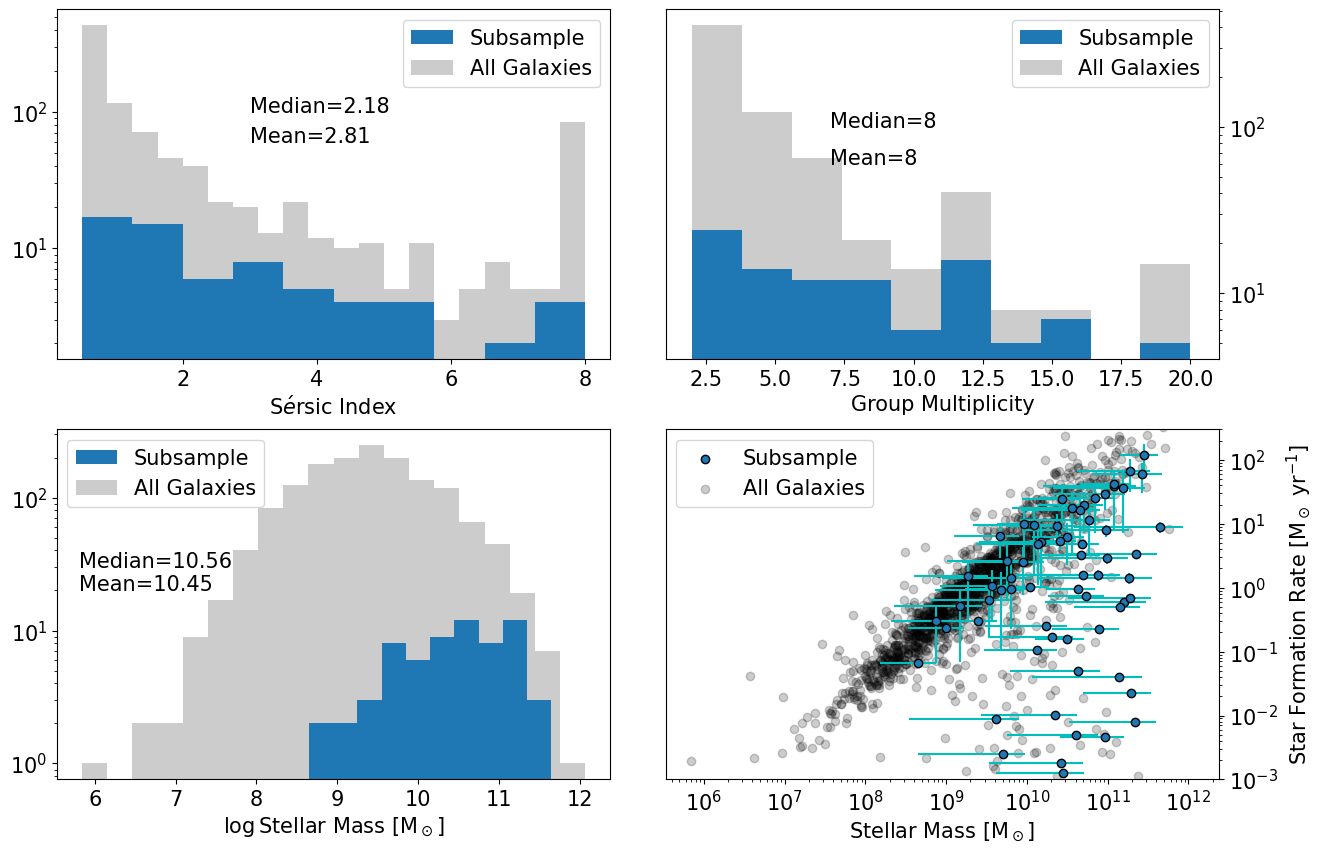

In [243]:
#sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#sample = sample.dropna()
#sample = sample[sample["v_asym_stars"]/sample["v_asym_tot_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
MAGPI_ID_not = prospect["MAGPIID"].to_numpy()
MAGPI_ID = sample["MAGPIID"].to_numpy()

# SFMS & Mass
file2 = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
file3 = file2[file2["MAGPIID"].isin(sample["MAGPIID"])]
file2 = file2[~file2["MAGPIID"].isin(sample["MAGPIID"])]
file = sample[sample["MAGPIID"].isin(file3["MAGPIID"])]

SFR = file3["SFRburst_median"].to_numpy()
M_sol = file3["StellarMass_median"].to_numpy()
M_sol_err = file3["StellarMass_16"].to_numpy()
SFR_err = file3["SFRburst_16"].to_numpy()
M_sol = M_sol[np.log10(SFR) > -3]
M_sol_err = M_sol_err[np.log10(SFR) > -3]
SFR_err = SFR_err[np.log10(SFR) > -3]
SFR = SFR[np.log10(SFR) > -3]
M_sol_2 = file2["StellarMass_median"].to_numpy()
SFR_2 = file2["SFRburst_median"].to_numpy()
M_sol_2 = M_sol_2[np.log10(SFR_2) > -3]
SFR_2 = SFR_2[np.log10(SFR_2) > -3]
#fit = scipy.stats.linregress(np.log10(M_sol_2), np.log10(SFR_2))
xx = np.linspace(np.min(M_sol_2), np.max(M_sol_2))
MS = (xx**(0.730)*(10**(-7.482)))
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
#SFR = bpt["SFR, dust corrected"].to_numpy()

# Environment
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
N_Gals = env[env["MAGPIID"].isin(sample["MAGPIID"])]["N_Gals"]
not_N_gals = env[~env["MAGPIID"].isin(sample["MAGPIID"])]["N_Gals"]

# Sersic
file1 = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file1 = file1.dropna()
file1 = file1.drop_duplicates(["MAGPIID"])
galfit = pd.read_csv("MAGPI_csv/MAGPI_GalfitSersicCat_v0.0.csv")
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
n2 = galfit["n"]
n2 = n2[n2 > 0]
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(prospect["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(prospect["MAGPIID"])]
n = galfit["n"]
n = n[n > 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Sersic
ax1.hist(n, zorder=2, label="Subsample", bins=10)
ax1.hist(n2, label="All Galaxies", color="k", bins=20, alpha=0.2)
ax1.text(s=f"Median={np.median(n):.2f}", x=3, y=100)
ax1.text(s=f"Mean={np.mean(n):.2f}", x=3, y=60)
#ax.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"S$\'{e}$rsic Index")
ax1.legend()
# Environment
ax2.hist(N_Gals, label="Subsample", zorder=2)
#ax2.hist(N_Gals_0, zorder=2, label="No Env. Metrics")
ax2.hist(not_N_gals, label="All Galaxies", color="k", alpha=0.2, zorder=1)
ax2.set_yscale("log")
ax2.set_xlabel("Group Multiplicity")
ax2.text(s=f"Median={np.median(N_Gals):.0f}", x=7, y=100)
ax2.text(s=f"Mean={np.mean(N_Gals):.0f}", x=7, y=60)
ax2.legend()
ax2.set_xlim(1.05,21.05)
# Mass
ax3.hist(np.log10(M_sol), zorder=2, label="Subsample", bins=10)
ax3.hist(np.log10(M_sol_2), label="All Galaxies", color="k", bins=20, alpha=0.2)
ax3.text(s=f"Median={np.median(np.log10(M_sol)):.2f}", x=5.8, y=30)
ax3.text(s=f"Mean={np.mean(np.log10(M_sol)):.2f}", x=5.8, y=20)
#ax.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel(r"$\log$Stellar Mass [M$_\odot$]")
ax3.legend()
# SFMS
ax4.scatter(M_sol, SFR, zorder=3, label="Subsample", ec="k")
ax4.errorbar(M_sol, SFR, xerr=M_sol_err, yerr=SFR_err, zorder=2, fmt=".c", ls="")
ax4.scatter(M_sol_2, SFR_2, zorder=1, alpha=0.2, c="k", label="All Galaxies")
#ax4.plot(xx, MS, ls="dashdot", c="magenta")
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_ylim(0.001, 300)
ax4.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax4.set_ylabel(r"Star Formation Rate [M$_\odot$ yr$^{-1}$]")
ax4.legend()
for ax in [ax2, ax4]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.savefig("plots/SFMS_Mass_Sersic_Env.pdf", bbox_inches="tight")

In [244]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = sample.dropna()
sample = sample[sample["v_asym_tot"]/sample["v_asym_tot_err"]>3]
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
sample = sample[sample["MAGPIID"].isin(env["MAGPIID"])]
env = env[env['MAGPIID'].isin(sample["MAGPIID"])]

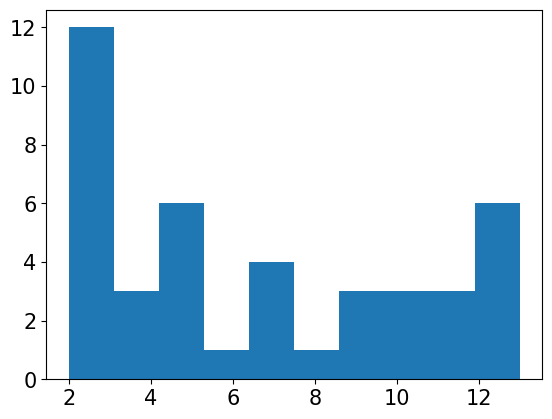

In [245]:
fig,ax = plt.subplots()
ax.hist(env["N_Gals"])
plt.savefig("plots/env_hist.pdf",bbox_inches="tight")

In [246]:
np.median(env["N_Gals"])

5.5

In [247]:
ld_sample = sample[np.array([env["N_Gals"]<=5]).T]
hd_sample = sample[np.array([env["N_Gals"]>5]).T]

In [248]:
hd_sample[hd_sample["v_asym_tot"]>0.04]

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
49,2308186140,0.065009,0.010276,0.028591,0.005257,0.082193,0.004881,0.025442,0.010275,0.033764,0.009532,0.040784,0.006140
50,2308198197,0.065229,0.010258,0.027794,0.005757,0.082355,0.005092,0.027256,0.010379,0.034508,0.010457,0.042814,0.006275
51,2308295194,0.065871,0.010324,0.028631,0.006363,0.082034,0.005144,0.027089,0.011468,0.034717,0.011502,0.041298,0.007414
52,2310167176,0.176850,0.007638,0.244635,0.024509,0.174906,0.005830,0.097675,0.004410,0.184516,0.029101,0.082671,0.003815
53,2310199196,0.176924,0.007855,0.246392,0.025257,0.175026,0.005558,0.096472,0.004421,0.190104,0.032073,0.082021,0.004223
54,2310313103,0.178480,0.008017,0.243287,0.019567,0.176267,0.005746,0.096683,0.003911,0.189437,0.025774,0.082588,0.003829


In [249]:
ld_sample[ld_sample["v_asym_tot"]>0.04]

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
0,1201302222,0.052818,0.010823,0.035638,0.007278,0.059102,0.005425,0.017203,0.009949,0.024652,0.011230,0.026743,0.006467
13,1207128248,0.072974,0.005267,0.202478,0.010322,0.049688,0.002387,0.037694,0.004953,0.147005,0.018300,0.039144,0.002257
14,1207181305,0.073148,0.005758,0.202761,0.011015,0.049699,0.002374,0.037565,0.005499,0.146532,0.020423,0.038606,0.002403
15,1207197197,0.071684,0.007780,0.203022,0.010771,0.049696,0.002586,0.037804,0.006051,0.147845,0.018560,0.038714,0.002200


N_gals=4 Frac =0!
N_gals=5 Frac =0!
N_gals=6 Frac =0!
N_gals=8 Frac =0!
N_gals=9 Frac =0!
N_gals=10 Frac =0!
N_gals=11 Frac =0!
N_gals=13 Frac =0!
No Gals with N_gals=14
No Gals with N_gals=15
No Gals with N_gals=16
No Gals with N_gals=17
No Gals with N_gals=18
No Gals with N_gals=19
No Gals with N_gals=20


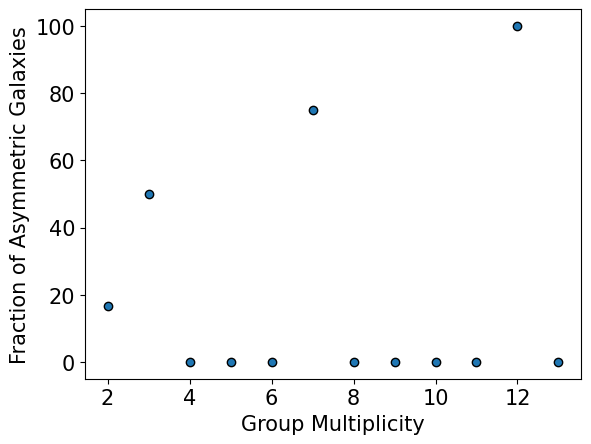

In [250]:
frac = []
n_frac= []
for i in range(2,21):
    ss = sample[np.array([env["N_Gals"]==i]).T]
    if len(ss)==0:
        print(f"No Gals with N_gals={i}")
        #frac.append(np.nan)
        #n_frac.append(0)
        continue
    if int((100*(len(ss[ss["v_asym_tot"]>0.04])/len(ss))))==0:
        print(f"N_gals={i} Frac =0!")
    frac.append(100*(len(ss[ss["v_asym_tot"]>0.04])/len(ss)))
    #n_frac.append(np.nan)
    #print("Grp. Multi={0:.0f}, {1:.1f} % Asymmetric".format(i,100*(len(ss[ss["v_asym_tot"]>0.04])/len(ss))))
frac = np.array(frac)
# frac[frac==0]=0
fig,ax = plt.subplots()
ax.scatter(np.arange(2,14,1),frac,ec="k")
#ax.scatter(np.arange(2,14,1),n_frac,ec="k",label='Not in Sample')
ax.set_xlabel("Group Multiplicity")
ax.set_ylabel("Fraction of Asymmetric Galaxies")
plt.savefig("plots/asym_frac.pdf",bbox_inches="tight")

In [251]:
ss=env[env["MAGPIID"].isin(sample["MAGPIID"])]

In [252]:
vv = sample[sample["MAGPIID"].isin(ss[ss["BCG?"]]["MAGPIID"])]
cen = vv[vv["v_asym_tot"]>0.04]
#env[env["MAGPIID"].isin(vv["MAGPIID"])]
vv

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
0,1201302222,0.052818,0.010823,0.035638,0.007278,0.059102,0.005425,0.017203,0.009949,0.024652,0.011230,0.026743,0.006467
1,1202197197,0.024911,0.000815,0.039339,0.001468,0.026928,0.000492,0.015884,0.001861,0.019193,0.002174,0.011044,0.000704
9,1205197197,0.015437,0.003800,0.063305,0.011700,0.027609,0.002405,0.007290,0.003835,0.097780,0.019887,0.031279,0.003406
15,1207197197,0.071684,0.007780,0.203022,0.010771,0.049696,0.002586,0.037804,0.006051,0.147845,0.018560,0.038714,0.002200
17,1209197197,0.031063,0.003570,0.015261,0.003118,0.023819,0.001175,0.004914,0.002391,0.025665,0.004208,0.014832,0.001271
31,1528197197,0.018575,0.000978,0.025095,0.002156,0.019769,0.000583,0.006450,0.002165,0.017051,0.002900,0.011314,0.001001
39,2301109255,0.021032,0.002940,0.030233,0.005730,0.021815,0.001316,0.013361,0.003231,0.016793,0.008793,0.012986,0.001851
43,2303197196,0.015889,0.002381,0.026217,0.003254,0.020140,0.001461,0.015594,0.004543,0.023458,0.004472,0.017533,0.001622
44,2304104201,0.010887,0.001401,0.017388,0.002362,0.019105,0.000723,0.008018,0.002658,0.009343,0.003868,0.009467,0.001009
46,2304196198,0.010838,0.001416,0.018215,0.002433,0.019061,0.000691,0.007587,0.003007,0.010366,0.003824,0.009397,0.001152


In [253]:
vv = sample[sample["MAGPIID"].isin(ss[~ss["BCG?"]]["MAGPIID"])]
sat = vv[vv["v_asym_tot"]>0.04]
vv

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
2,1203076068,0.018227,0.001342,0.049114,0.003480,0.030450,0.000771,0.004934,0.001329,0.017913,0.003756,0.010023,0.001233
3,1203152196,0.018448,0.001304,0.048814,0.003233,0.030568,0.000671,0.004893,0.001460,0.017250,0.003999,0.010181,0.001183
4,1203247089,0.018283,0.001186,0.049417,0.003546,0.030563,0.000841,0.004610,0.001182,0.018579,0.004019,0.010127,0.000961
5,1203287367,0.018277,0.001411,0.049424,0.003392,0.030483,0.000784,0.004649,0.001195,0.018257,0.004411,0.010266,0.000961
6,1203303373,0.018377,0.001324,0.049024,0.003327,0.030576,0.000785,0.004924,0.001372,0.017614,0.004206,0.010227,0.000959
8,1205196165,0.014210,0.003856,0.065065,0.009193,0.027357,0.002178,0.006528,0.003828,0.101128,0.017844,0.031281,0.003395
10,1206151090,0.031117,0.002833,0.023538,0.002978,0.034196,0.001843,0.006677,0.004406,0.021430,0.003859,0.008467,0.002623
11,1206243216,0.031477,0.002574,0.022701,0.002922,0.034087,0.001956,0.007536,0.004626,0.020286,0.004081,0.008989,0.002741
12,1206322202,0.031053,0.002787,0.023106,0.003128,0.034170,0.001888,0.007152,0.004591,0.020854,0.004000,0.008782,0.002674
13,1207128248,0.072974,0.005267,0.202478,0.010322,0.049688,0.002387,0.037694,0.004953,0.147005,0.018300,0.039144,0.002257


In [254]:
bpt = pd.read_csv('/Volumes/DS/MAGPI/MAGPI_Emission_Lines/kinemetry_sample_BPT.csv')
bpt = bpt[bpt["MAGPIID"].isin(ss["MAGPIID"])]

In [255]:
bpt[bpt["MAGPIID"].isin(cen["MAGPIID"])]

,MAGPIID,Ha,Ha_err,Hb,[OI]6302,[OIII]5008,[NII]6585,[SII]6718,"type(sf+AGN=0, sf=1, sy=2, ln=3)","type(sf=1, sy=2, ln=3) SII","SFR, dust corrected",SFR_err,"re, arcsec","re, kpc"
0,1201302222,19010.347445,1.796036e-17,5577.775648,363.602065,15311.362648,789.004158,3620.363398,1.0,1.0,0.456965,0.029455,0.813,31.484996
15,1207197197,104901.596090,2.162297e-16,23118.046138,914.851080,23337.630361,70177.096339,10708.083412,0.0,1.0,5.515802,0.415625,1.756,73.621939
50,2308198197,54111.678195,8.598661e-16,7124.373775,1384.074728,7644.786326,33808.337200,9858.709770,0.0,1.0,10.511373,1.986254,1.508,69.309500
53,2310199196,124848.936484,4.141620e-16,26560.470581,5025.252167,23491.739819,69909.743465,31737.059174,0.0,1.0,5.335764,0.599165,2.213,80.493163


In [256]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = sample[sample["v_asym_tot"]/sample["v_asym_tot_err"]>3]
ss = env[env["MAGPIID"].isin(sample["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(ss["MAGPIID"])]

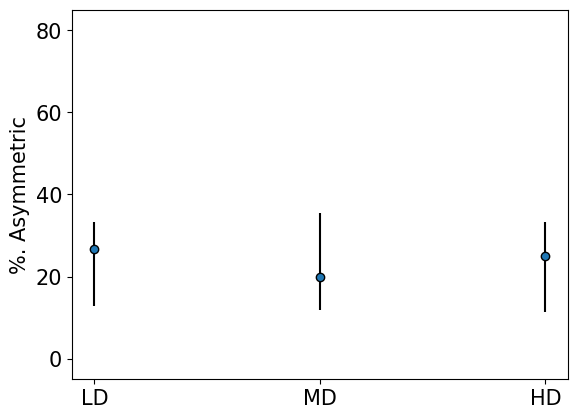

In [257]:
# E. Cameron's, 2011 Bayesian estimation of binomial errors.
def binomial_errors(n, k, c=0.683):
    import scipy.stats.distributions as dist
    p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
    p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)
    lower   = k/n - p_lower
    upper   = p_upper - k/n
    return np.array([upper, lower])
bins = np.linspace(4,14,3)
ld = []
md = []
hd = []
for i in range(len(ss["N_Gals"].to_numpy())):
    if ss["N_Gals"].to_numpy()[i]<=bins[0]:
        ld.append(ss["MAGPIID"].to_numpy()[i])
    if bins[0]<ss["N_Gals"].to_numpy()[i]<=bins[1]:
        md.append(ss["MAGPIID"].to_numpy()[i])
    if bins[1]<ss["N_Gals"].to_numpy()[i]<=bins[2]:
        hd.append(ss["MAGPIID"].to_numpy()[i])
ld_sample = sample[sample["MAGPIID"].isin(ld)]
md_sample = sample[sample["MAGPIID"].isin(md)]
hd_sample = sample[sample["MAGPIID"].isin(hd)]
frac = []
scatter = []
for i in [ld_sample,md_sample,hd_sample]:
    frac.append(len(i[i["v_asym_tot"] > 0.04])/len(i))
    scatter.append(binomial_errors(n=len(i),k=len(i[i["v_asym_tot"] > 0.04])))
scatter = np.array(scatter)
scatter = np.reshape(scatter,(2,3))*100
frac = np.array(frac)
frac = frac*100
fig,ax = plt.subplots()
#ax.hist(frac,ec="k",zorder=2)
ax.scatter(np.array(["LD","MD","HD"]),frac,zorder=2,ec="k")
ax.errorbar(np.array(["LD","MD","HD"]),frac,yerr=scatter,fmt=".k",zorder=1)
#ax.set_xlabel("Group Multi.")
ax.set_ylabel("%. Asymmetric")
ax.set_ylim(-5,85)
#ax.set_xlim(2.95,14.95)
plt.savefig("plots/asym_frac.pdf",bbox_inches="tight")

In [258]:
scatter

array([[13.73785436,  8.18393788, 13.69757634],
       [ 6.55483621, 15.55807817,  8.31687394]])

In [41]:
cen = ss[ss["BCG?"]]
sat = ss[~ss["BCG?"]]

In [45]:
v = sample[sample["MAGPIID"].isin(cen["MAGPIID"])]
vv = v[v["v_asym_05re"]<v["v_asym_15re"]]
v_c = v[v["v_asym_tot"]>0.04]
a_cen = cen[np.array(~v["MAGPIID"].isin(v_c["MAGPIID"]))]
a = len(cen[np.array(~v["MAGPIID"].isin(v_c["MAGPIID"]))])
b = len(cen)
err = binomial_errors(b,a)
print(f"{a:.0f},{b:.0f},{a/b:.2f}+{err[0]:.2f}-{err[1]:.2f}")

8,12,0.67+0.10-0.15


In [46]:
v = sample[sample["MAGPIID"].isin(sat["MAGPIID"])]
vv = v[v["v_asym_05re"]<v["v_asym_15re"]]
v_s = v[v["v_asym_tot"]>0.04]
a_sat= sat[np.array(v["MAGPIID"].isin(v_s["MAGPIID"]))]
a = len(sat[np.array(v["MAGPIID"].isin(v_s["MAGPIID"]))])
b = len(sat)
err = binomial_errors(b,a)
print(f"{a:.0f},{b:.0f},{a/b:.2f}+{err[0]:.2f}-{err[1]:.2f}")

6,30,0.20+0.09-0.05


In [47]:
print(len(a_sat[a_sat["N_Gals"]>4]))
print(len(a_sat))

4
6


In [49]:
a = 4
b = 6
err = binomial_errors(b,a)
print(f"{a:.0f},{b:.0f},{a/b:.2f}+{err[0]:.2f}-{err[1]:.2f}")

4,6,0.67+0.13-0.21


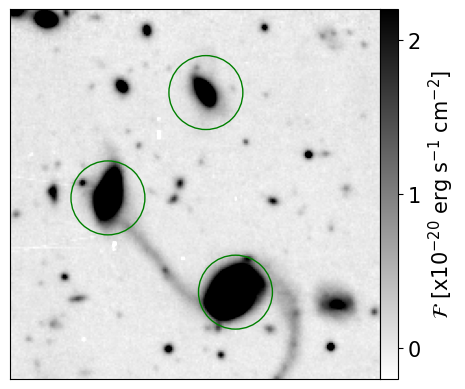

In [107]:
DL = cosmo.luminosity_distance(0.32).to(u.kpc).value
pix = np.degrees(100*3600)/DL
with fits.open("MAGPI_mini-images/MAGPI1207_CollapsedImage.fits") as file:
    img = file[1].data
    dq = file[2].data

import matplotlib.colors as cm
cmap = plt.get_cmap("gray_r")
cmap.set_bad(color="white")
fig,ax = plt.subplots()
p=ax.imshow(img,origin="lower",cmap=cmap,vmin=-0.2,vmax=2.2)
#ax.add_patch(Circle(xy=(pix, pix), radius=pix, fc="none", ec="green"))
#ax.plot([100,100+pix],[175,175],c="green")
ax.add_patch(Circle(xy=(197, 197), radius=20, fc="none", ec="green"))
ax.add_patch(Circle(xy=(128, 248), radius=20, fc="none", ec="green"))
ax.add_patch(Circle(xy=(181, 305), radius=20, fc="none", ec="green"))
ax.set_xlim(75,275)
ax.set_ylim(150,350)
ax.set_xticks([])
ax.set_yticks([])
plt.colorbar(p,ax=ax,label=r"$\mathcal{F}$ [x10$^{-20}$ erg s$^{-1}$ cm$^{-2}$]",pad=0,fraction=0.05,ticks=[0,1,2,3,4,5])
plt.savefig("plots/MAGPI1207_field.pdf",bbox_inches="tight")

In [51]:
# E. Cameron's, 2011 Bayesian estimation of binomial errors.
def binomial_errors(n, k, c=0.683):
    import scipy.stats.distributions as dist
    p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
    p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)
    lower   = [k/n - p_lower]
    upper   = [p_upper - k/n]
    return np.array([upper, lower])

In [52]:
cen_err = binomial_errors(n=len(ss),k=len(cen))
sat_err = binomial_errors(n=len(ss),k=len(sat))

In [53]:
binomial_errors(12,4)*100

array([[15.16182223],
       [10.33549367]])

In [54]:
ss

,MAGPIID,N_Gals,BCG?,GroupName
15,1201302222,2.0,True,"""1201005"""
28,1202197197,2.0,True,"""1202004"""
34,1203303373,7.0,False,"""1203001"""
39,1203076068,10.0,False,"""1203002"""
45,1203247089,10.0,False,"""1203002"""
46,1203287367,10.0,False,"""1203002"""
48,1203152196,4.0,False,"""1203003"""
73,1205196165,5.0,False,"""1205002"""
74,1205197197,5.0,True,"""1205002"""
90,1206151090,11.0,False,"""1206004"""


In [55]:
cen

,MAGPIID,N_Gals,BCG?,GroupName
15,1201302222,2.0,True,"""1201005"""
28,1202197197,2.0,True,"""1202004"""
74,1205197197,5.0,True,"""1205002"""
135,1207197197,3.0,True,"""1207005"""
181,1209197197,5.0,True,"""1209002"""
464,1528197197,5.0,True,"""1528004"""
592,2301109255,2.0,True,"""2301001"""
647,2303197196,2.0,True,"""2303005"""
662,2304196198,3.0,True,"""2304001"""
668,2304104201,2.0,True,"""2304004"""


In [56]:
sat

,MAGPIID,N_Gals,BCG?,GroupName
34,1203303373,7.0,False,"""1203001"""
39,1203076068,10.0,False,"""1203002"""
45,1203247089,10.0,False,"""1203002"""
46,1203287367,10.0,False,"""1203002"""
48,1203152196,4.0,False,"""1203003"""
73,1205196165,5.0,False,"""1205002"""
90,1206151090,11.0,False,"""1206004"""
95,1206243216,11.0,False,"""1206004"""
98,1206322202,11.0,False,"""1206004"""
133,1207128248,3.0,False,"""1207005"""


/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_10156/1127048850.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sy = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2]
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_10156/1127048850.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ln = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3]
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_10156/1127048850.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sf = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==1]
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_10156/1127048850.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  comp = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0]


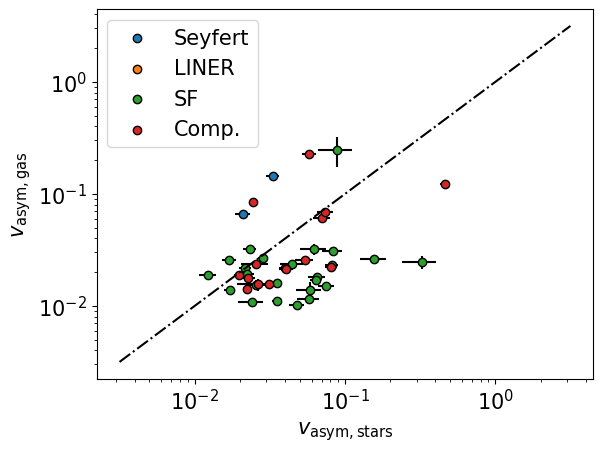

In [106]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
file = file[file["v_asym_s"]/file["v_asym_s_err"]>3]
file = file[file["v_asym_g"]/file["v_asym_g_err"]>3]
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
sy = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2]
ln = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3]
sf = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==1]
comp = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0]
fig,ax = plt.subplots()
for df,lab in zip([sy,ln,sf,comp],["Seyfert","LINER","SF","Comp."]):
    ax.scatter(df["v_asym_s"],df["v_asym_g"],ec="k",zorder=2,label=lab)
    ax.errorbar(df["v_asym_s"],df["v_asym_g"],xerr=df["v_asym_s_err"],yerr=df["v_asym_g_err"],fmt=".k",zorder=1)
ax.plot(np.logspace(-2.5,0.5),np.logspace(-2.5,0.5),ls='dashdot',color='k')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,stars}$")
ax.set_ylabel(r"$v_{\rm asym,gas}$")
ax.legend()
plt.savefig("plots/SF_AGN_gas_vs_stars.pdf",bbox_inches="tight")

In [181]:
age = pd.read_csv("MAGPI_stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
file = file.dropna()
file= file[file["v_asym_g"]/file["v_asym_g_err"]>3]
age = age[age["MAGPIID"].isin(file["MAGPIID"])]
file = file[file["MAGPIID"].isin(age["MAGPIID"])]
ageLW = age["logage_LW_2re"].to_numpy()
frac_last_Gyr = age["fraction_last_Gyr_LW_2re"].to_numpy()
metal = age["metallicity_LW_2re"].to_numpy()
file["d_asym"] = np.array(file["v_asym_g"].to_numpy() - file["v_asym_s"].to_numpy())/(file["v_asym_s"].to_numpy())
file["d_asym_err"] = np.array(np.sqrt((file["v_asym_g_err"]/file["v_asym_g"])**2+(file["v_asym_s_err"]/file["v_asym_s"])**2))
#d_asym_err = np.sqrt((d_asym_err/d_asym)**2 - (file["v_asym_s_err"]/file["v_asym_s"])**2)

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_10156/2024017161.py:10: RuntimeWarning: divide by zero encountered in divide
  file["d_asym"] = np.array(file["v_asym_g"].to_numpy() - file["v_asym_s"].to_numpy())/(file["v_asym_s"].to_numpy())


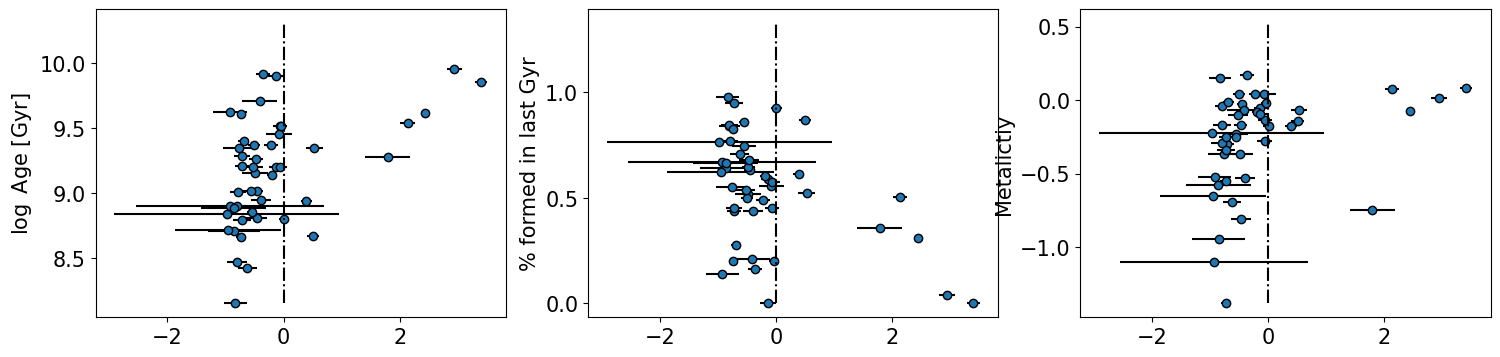

In [190]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
ax1.scatter(file["d_asym"],ageLW,ec='k',zorder=2)
ax1.errorbar(file["d_asym"],ageLW,xerr=file["d_asym_err"],fmt=".k",zorder=1)
ax2.scatter(file["d_asym"],frac_last_Gyr,ec='k',zorder=2)
ax2.errorbar(file["d_asym"],frac_last_Gyr,xerr=file["d_asym_err"],fmt=".k",zorder=1)
ax3.scatter(file["d_asym"],metal,ec='k',zorder=2)
ax3.errorbar(file["d_asym"],metal,xerr=file["d_asym_err"],fmt=".k",zorder=1)
for ax,arr in zip([ax1,ax2,ax3],[ageLW,frac_last_Gyr,metal]):
    ax.vlines(x=0,ymin=np.nanmin(arr),ymax=np.nanmax(arr)+0.35,ls="dashdot",colors="k")
    #ax.set_xlim(-5.3,5.3)
    # ax.text(x=-2.8,y=np.nanmax(arr)+0.5,s="Star Asym Dom.")
    # ax.text(x=0.8,y=np.nanmax(arr)+0.5,s="Gas Asym Dom.")
ax1.set_ylabel(r"$\log$ Age [Gyr]")
ax2.set_ylabel(r"% formed in last Gyr")
ax3.set_ylabel(r"Metalictiy")
ax2.yaxis.set_ticks([0,0.5,1])
#ax2.yaxis.tick_right()
plt.savefig("plots/d_asym.pdf",bbox_inches="tight")

In [103]:
sf[sf["v_asym_g"]>sf["v_asym_s"]

,Unnamed: 0,MAGPIID,v_asym_g,v_asym_g_err,v_asym_s,v_asym_s_err
4,4,1202197197,0.021793,0.000220,0.021227,0.001617
34,34,1501178229,0.246558,0.065046,0.089076,0.023503
42,42,1503208231,0.032382,0.000738,0.023442,0.002412
49,49,1508197198,0.018844,0.001423,0.012450,0.001297
79,79,2301109255,0.025368,0.000411,0.016512,0.001943


In [191]:
file2 = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_PA.csv")
file2 = file2[file2["MAGPIID"].isin(file["MAGPIID"])]
file2

,MAGPIID,PA_g,PA_s,D_PA,V_rot_g,V_rot_s
3,1201302222,23.031432,-24.640199,47.671632,46.658565,38.051594
4,1202197197,-38.291775,-40.126330,1.834555,216.447193,234.257621
7,1203076068,-25.628735,-19.701898,5.926837,149.511524,138.074523
12,1203247089,-39.481549,-38.345067,1.136482,51.113622,41.611988
15,1204198199,-19.353473,-20.289639,0.936166,225.818767,206.679880
17,1205196165,-14.185515,-19.740061,5.554546,106.533423,82.055668
18,1205197197,34.752258,33.304758,1.447500,99.110144,99.880546
19,1206151090,-35.392804,-24.240417,11.152386,65.585197,85.223329
25,1206322202,-7.335926,23.603331,30.939258,59.605119,14.679357
26,1207128248,-35.244612,-14.652705,20.591908,150.315438,165.354019


In [173]:
file[file["d_asym"]>20]

,MAGPIID,v_asym_g,v_asym_g_err,v_asym_s,v_asym_s_err,d_asym,d_asym_err
12,1203247089,0.024681,0.001520,0.000000,0.000000,inf,NaN
28,1207197197,1.857568,3.608916,0.075171,0.009206,23.711355,1.946673


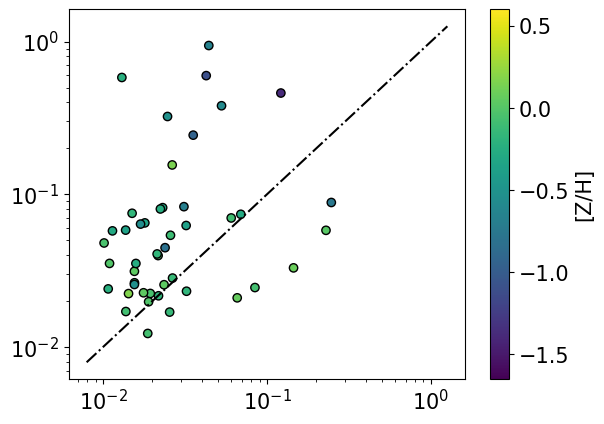

In [202]:
fig,ax=plt.subplots()
p=ax.scatter(file["v_asym_g"],file["v_asym_s"],ec="k",c=metal,vmin=-1.65,vmax=0.6)
ax.plot(np.logspace(-2.1,0.1),np.logspace(-2.1,0.1),ls="dashdot",color="k")
ax.set_xscale("log")
ax.set_yscale("log")
plt.colorbar(p,ax=ax,label='[Z/H]')
plt.show()

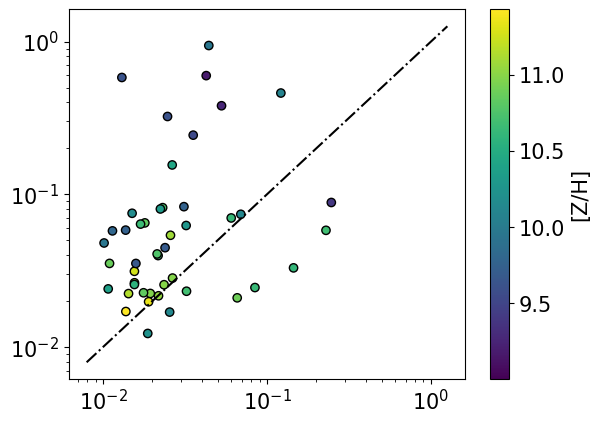

In [206]:
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]
mass = np.log10(prospect["StellarMass_median"].to_numpy())
fig,ax=plt.subplots()
p=ax.scatter(file["v_asym_g"],file["v_asym_s"],ec="k",c=mass)
ax.plot(np.logspace(-2.1,0.1),np.logspace(-2.1,0.1),ls="dashdot",color="k")
ax.set_xscale("log")
ax.set_yscale("log")
plt.colorbar(p,ax=ax,label='[Z/H]')
plt.show()

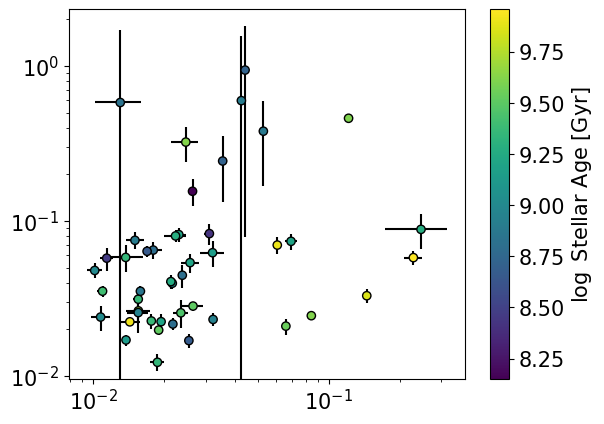

In [217]:
file = file[file["v_asym_g"]/file["v_asym_g_err"]>3]
fig,ax=plt.subplots()
p=ax.scatter(file["v_asym_g"],file["v_asym_s"],ec="k",c=ageLW,zorder=2)
ax.errorbar(file["v_asym_g"],file["v_asym_s"],xerr=file["v_asym_g_err"],yerr=file["v_asym_s_err"],fmt=".k",zorder=1)
plt.colorbar(p,ax=ax,label=r"$\log$ Stellar Age [Gyr]")
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

In [216]:
age

,MAGPIID,has_ppxf_fit_0.5re,quick_SN_0.5re,ppxf_SN_0.5re,logage_MW_0.5re,metallicity_MW_0.5re,alpha_MW_0.5re,logage_LW_0.5re,metallicity_LW_0.5re,alpha_LW_0.5re,...,logage_LW_3arcsec,metallicity_LW_3arcsec,alpha_LW_3arcsec,ppxf_chi2_3arcsec,sigma_3arcsec,fraction_last_Gyr_MW_3arcsec,fraction_less_solar_MW_3arcsec,fraction_last_Gyr_LW_3arcsec,fraction_less_solar_LW_3arcsec,QOP_3arcsec
87,1201302222,True,9.606786,8.189251,9.631752,-1.013311,0.031771,9.191170,-0.897170,0.115373,...,8.878485,-1.065152,0.273234,1.634724,56.421526,0.384400,0.693251,0.683084,0.548746,[4]
138,1202197197,True,102.622574,37.602139,9.719202,0.087509,0.197620,9.274061,-0.168836,0.082740,...,9.104819,-0.206395,0.082697,8.247158,139.292890,0.196719,0.081766,0.659412,0.358249,[4]
199,1203076068,True,26.341007,15.531944,9.763188,-0.369228,0.159808,8.668977,-0.493902,0.300663,...,8.182021,0.079576,0.216748,8.015715,180.529820,1.000000,0.022659,1.000000,0.079113,[4]
248,1203247089,True,9.001078,7.398410,9.127546,-1.343676,0.060735,8.801714,-1.322265,0.082694,...,8.838912,-1.209701,0.264803,1.789773,121.040924,0.193817,0.844582,0.408273,0.807607,[4]
328,1204198199,True,88.404280,53.133037,9.960473,0.208750,0.120751,9.850948,0.092027,0.169865,...,9.714194,0.018117,0.154617,3.070302,147.927488,0.035339,0.119740,0.252388,0.228475,[4]
420,1205196165,True,43.447906,33.171664,9.470792,-0.187289,0.133674,9.092434,-0.081848,0.142877,...,9.011452,-0.045874,0.162595,2.824290,82.190368,0.584696,0.421214,0.767957,0.305162,[4]
421,1205197197,True,107.296030,49.574204,9.848816,0.133769,0.190756,9.568711,-0.099444,0.139870,...,9.310680,-0.033085,0.125625,4.709925,92.584877,0.096626,0.054038,0.413776,0.244497,[4]
513,1206151090,True,33.095226,15.050512,9.264995,-0.642852,0.309198,8.365485,-0.677662,0.216699,...,8.419078,-0.650296,0.208769,3.155991,99.614382,0.378370,0.661059,0.694773,0.511906,[4]
574,1206322202,True,16.309128,12.767794,9.181324,-1.137845,0.205015,8.731983,-0.769066,0.254451,...,8.707607,-0.809454,0.377882,2.027153,0.565664,0.263611,0.801362,0.535041,0.620477,[4]
625,1207128248,True,71.408260,10.058407,10.081650,-0.039111,0.356731,9.636110,-0.070620,0.242706,...,9.582261,0.033753,0.208402,34.566791,152.406817,0.077253,0.498203,0.455938,0.345691,[4]
